## Kleva & Drake map



In [1]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

4-element Array{String,1}:
 "@"                                          
 "@v#.#"                                      
 "@stdlib"                                    
 "/home/evelyn/Documentos/Tesis/Programas/IPM"

In [2]:
using ParametrizacionMetodo
using mapeos
using PyPlot
using TaylorSeries
using IntervalArithmetic, IntervalRootFinding
using ValidatedNumerics
using StaticArrays


Definimos el mapeo.

In [3]:
function Kleva(x,y,A)
    """Kleva(x,y,A) es una función que define el mapeo de Kleva & Drake.
        Recibe:x,y,A donde A es un parámetro. 
    """
    x_n = x - 2pi*A*sin(y)
    y_n = y + 2pi*A*sin(x-2pi*A*sin(y))
    return [x_n,y_n]
end

Kleva (generic function with 1 method)

Definimos un mapeo con un parámetro fijo.

In [4]:
Kleva1(x,y) = Kleva(x,y,0.7)

Kleva1 (generic function with 1 method)

In [5]:
Orden1 = 80 #order of polynomial
p_fijo_1 = [0.,0.]  #fixed point
t_1 = [-10.,10.] #time intrval for evaluate the parameterization
delta_t_1 = 0.125 #step for evaluate
Ws_1,Es_1,eigvec_s_1,eigval_s_1 = Estable(Kleva1, Orden1, p_fijo_1, t_1, delta_t_1) ;
Wu_1,Eu_1,eigvec_u_1,eigval_u_1 = Inestable(Kleva1, Orden1, p_fijo_1, t_1, delta_t_1);


In [9]:
function IterarMap(f, x_ini, n)   #Definimos una función para iterar el mapeo

    x = x_ini[1]                      #                                     #Damos condiciones iniciales
    y = x_ini[2]                          #

    iteradosMapX = [x]
    iteradosMapY = [y]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente
        F = f(x,y)

        push!(iteradosMapX,(F[1]+F[2])/2)
        push!(iteradosMapY,(F[1]-F[2])/2)

        x = (F[1]+F[2])/2
        y = (F[1]-F[2])/2

    end

    return iteradosMapX, iteradosMapY  #La funcion iterados regresa las listas que corresponden a la trayectoria del

end

function GraficarMap(f)
    n = 10
    #s=4pi/28.
    s = 10/60
    i=0.
    for p_i=-3:s:3
        for x_i = -3:s:3
            i=i+1
            x_ini=[p_i,x_i]
            a,b = IterarMap(f,x_ini,n)
            p = scatter(b[2:10],a[2:10],marker=".",s=0.1,color="gray")
        end
    end

end

function Evaluar(Tiempo, paso, Pol, PuntoFijo, col)
    ValX = Float64[]
    ValY = Float64[]

    push!(ValX, PuntoFijo[1])
    push!(ValY, PuntoFijo[2])
    #@show(ValX)
    #pol = (Pol[1]+Pol[2])/2
    for t = Tiempo[1]:paso:Tiempo[2]

        x = Float64(Pol[1](t))+PuntoFijo[1]
        y = Float64(Pol[2](t))+PuntoFijo[2]

        push!(ValX,x)
        push!(ValY,y)

    end

    p = plot((ValX+ValY)/2,(ValX-ValY)/2,linestyle = "-",marker=",",color=col)



    title("espacio fase")
    xlabel(L"$x$")
    ylabel(L"$y$")
    xlim(-10,10)
    ylim(-10,10)


end

function GraficarEst(Tiempo,paso,f,Pol,PuntoFijo,col)
    GraficarMap(f)
    Evaluar(Tiempo,paso,Pol,PuntoFijo,col)

end



GraficarEst (generic function with 1 method)

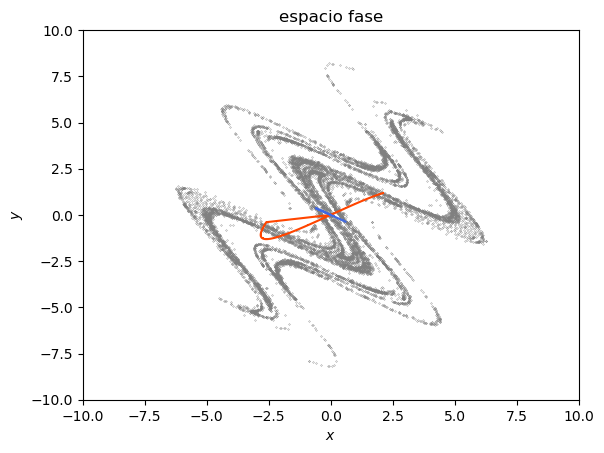

(-10, 10)

In [11]:

GraficarEst([-10,4.],0.2,Kleva1,Ws_1,[0.,0.],"orangered")
GraficarEst([-1.,1.],0.2,Kleva1,Wu_1,[0.,0.],"royalblue")

In [12]:
ErrorS1 = CalculoError(Kleva1, Ws_1,Es_1,[-3.,3.],delta_t_1);
ErrorU1 = CalculoError(Kleva1, Wu_1,Eu_1,[-3.,3.],delta_t_1);

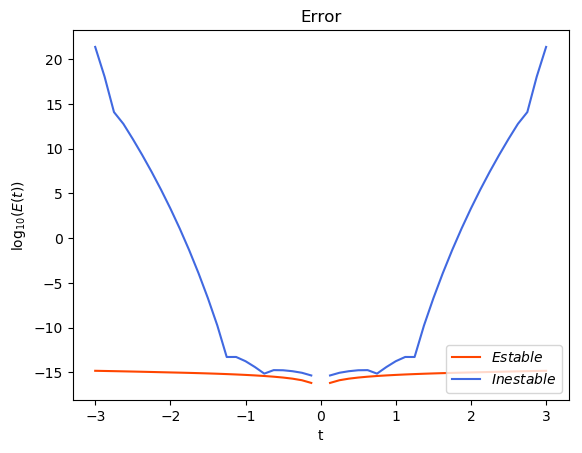

PyObject <matplotlib.legend.Legend object at 0x7fe51a008198>

In [13]:
plot(ErrorS1[1],log10.(ErrorS1[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU1[1],log10.(ErrorU1[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

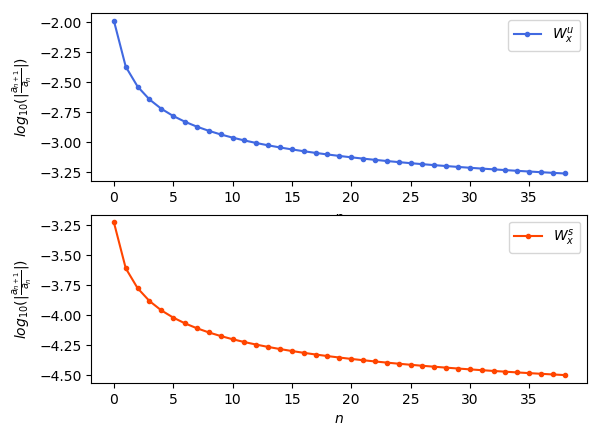

PyObject <matplotlib.legend.Legend object at 0x7fe51b2d65c0>

In [14]:

ConverS_1=Convergencia(Ws_1[1],Ws_1[2])#Hadamard
ConverU_1=Convergencia(Wu_1[1],Wu_1[2])


Cs1=[log10(abs(ConverS_1[1][i])) for i in 1:length(ConverS_1[1])]
Cu1=[log10(abs(ConverU_1[1][i])) for i in 1:length(ConverU_1[1])]

subplot(2,1,1)
plot(Cs1,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu1,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

Con otro valor del parámetro

In [15]:
Kleva2(x,y) = Kleva(x,y,0.5)

Kleva2 (generic function with 1 method)

In [16]:
Orden2 = 80 #order of polynomial
p_fijo_2 = [0.,0.]  #fixed point
t_2 = [-10.,10.] #time intrval for evaluate the parameterization
delta_t_2 = 0.125 #step for evaluate
Ws_2,Es_2,eigvec_s_2,eigval_s_2 = Estable(Kleva2, Orden2, p_fijo_2, t_2, delta_t_2) ;
Wu_2,Eu_2,eigvec_u_2,eigval_u_2 = Inestable(Kleva2, Orden2, p_fijo_2, t_2, delta_t_2);

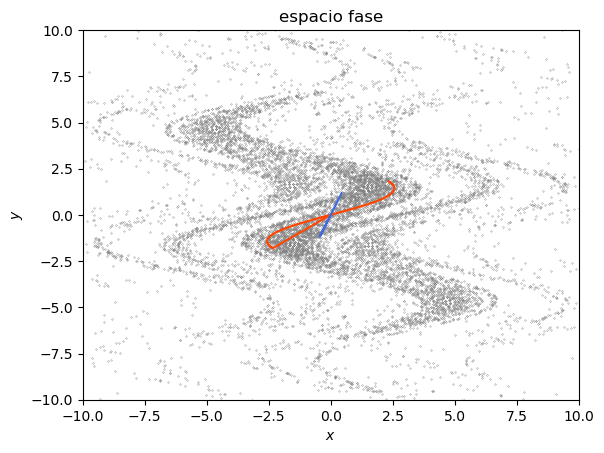

(-10, 10)

In [19]:
GraficarEst([-6,6],0.02,Kleva2,Ws_2,[0.,0.],"orangered")
GraficarEst([-1.3,1.3],0.02,Kleva2,Wu_2,[0.,0.],"royalblue")

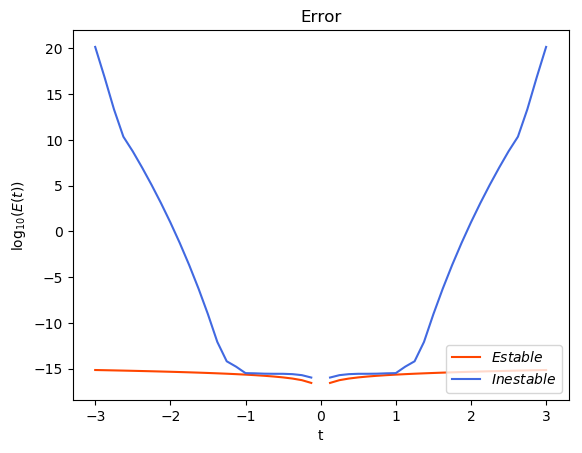

PyObject <matplotlib.legend.Legend object at 0x7fe51a08a748>

In [20]:

ErrorS2 = CalculoError(Kleva2, Ws_2,Es_2,[-3.,3.],delta_t_2)
ErrorU2 = CalculoError(Kleva2, Wu_2,Eu_2,[-3.,3.],delta_t_2)


plot(ErrorS2[1],log10.(ErrorS2[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU2[1],log10.(ErrorU2[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

Con otro parámetro.

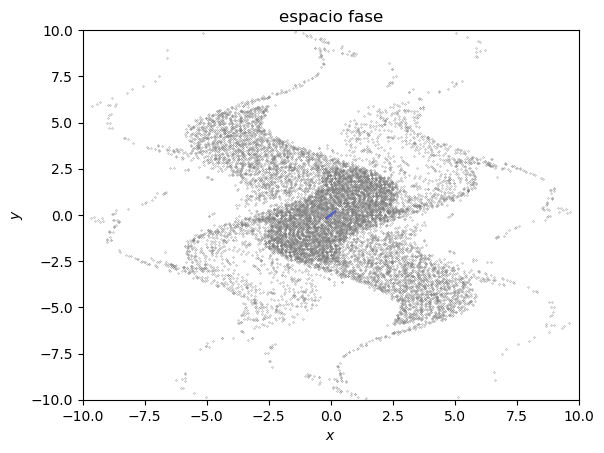

(-10, 10)

In [24]:
Kleva3(x,y) = Kleva(x,y,0.32)

#Orden2 = 80 #order of polynomial
#p_fijo_2 = [0.,0.]  #fixed point
#t_2 = [-10.,10.] #time interval for evaluate the parameterization
#delta_t_2 = 0.125 #step for evaluate
Ws_3,Es_3,eigvec_s_3,eigval_s_3 = Estable(Kleva3, Orden2, p_fijo_2, t_2, delta_t_2) ;
Wu_3,Eu_3,eigvec_u_3,eigval_u_3 = Inestable(Kleva3, Orden2, p_fijo_2, t_2, delta_t_2);

GraficarEst([-0.3,0.3],0.02,Kleva3,Ws_3,[0.,0.],"orangered")
GraficarEst([-0.3,0.3],0.02,Kleva3,Wu_3,[0.,0.],"royalblue")




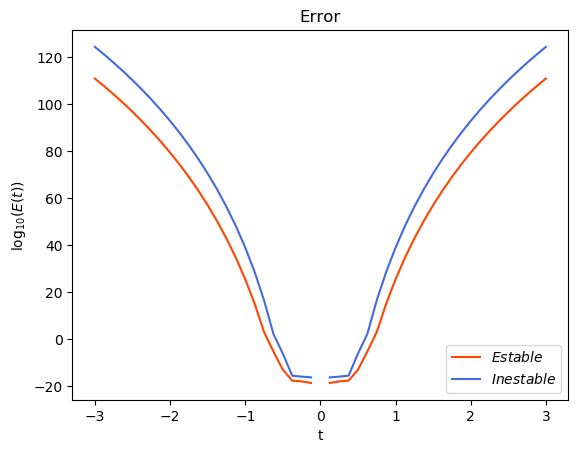

PyObject <matplotlib.legend.Legend object at 0x7fe51a524fd0>

In [25]:
ErrorS3 = CalculoError(Kleva3, Ws_3,Es_3,[-3.,3.],delta_t_2)
ErrorU3 = CalculoError(Kleva3, Wu_3,Eu_3,[-3.,3.],delta_t_2)


plot(ErrorS3[1],log10.(ErrorS3[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU3[1],log10.(ErrorU3[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

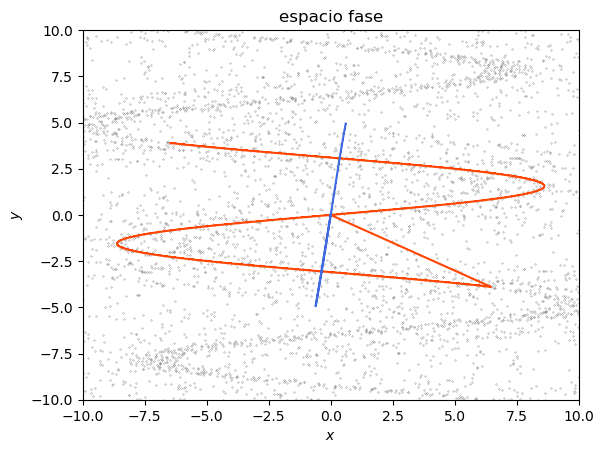

(-10, 10)

In [34]:
Kleva4(x,y) = Kleva(x,y,1.4)

#Orden2 = 80 #order of polynomial
#p_fijo_2 = [0.,0.]  #fixed point
#t_2 = [-10.,10.] #time interval for evaluate the parameterization
#delta_t_2 = 0.125 #step for evaluate
Ws_4,Es_4,eigvec_s_4,eigval_s_4 = Estable(Kleva4, Orden2, p_fijo_2, t_2, delta_t_2) ;
Wu_4,Eu_4,eigvec_u_4,eigval_u_4 = Inestable(Kleva4, Orden2, p_fijo_2, t_2, delta_t_2);

GraficarEst([-35.3,35.3],0.02,Kleva4,Ws_4,[0.,0.],"orangered")
GraficarEst([-5.3,5.3],0.02,Kleva4,Wu_4,[0.,0.],"royalblue")




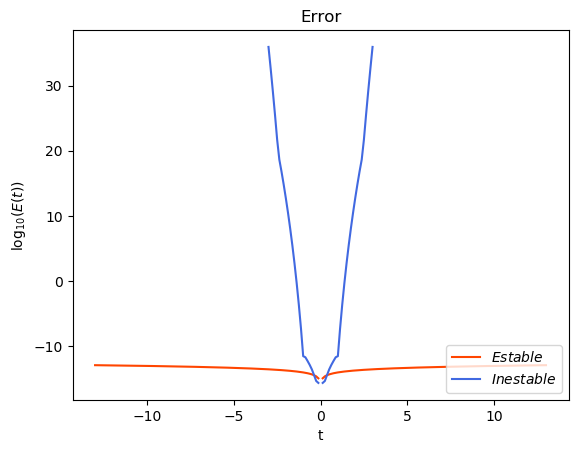

PyObject <matplotlib.legend.Legend object at 0x7fe51a6a6550>

In [35]:
ErrorS4 = CalculoError(Kleva4, Ws_4,Es_4,[-13.,13.],delta_t_2)
ErrorU4 = CalculoError(Kleva4, Wu_4,Eu_4,[-3.,3.],delta_t_2)


plot(ErrorS4[1],log10.(ErrorS4[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU4[1],log10.(ErrorU4[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

Now we analyze the manifolds using some values of the parameter and with diferents orders of parameterization. Indeed we use the inverse map for compute the parameterization of the stable manifold.

The next figure shows the behavior of the error when we computes the parameterization of the same manifold use different orders.

### Por modificar!

In [129]:
function Intersección(p)
    (x,y)=p
    V= SVector( Ws_2[1](x)-Wu_2[1](y), Ws_2[2](x)-Wu_2[2](y)-2pi )
#    @show(p, V)
end

Intersección (generic function with 1 method)

We define a interval for search the intersection.

In [130]:
X = (-10.1..(16.1))×(-15.1..(10.1)) # 2D IntervalBox;

In [131]:
Intersección(X)

2-element SArray{Tuple{2},Interval{Float64},1,2}:
 [-1788.46, 1846.3]   
   [-46.9299, 45.4672]

In [132]:
r = roots(Intersección, X, Newton, 1e-6)

4-element Array{Root{IntervalBox{2,Float64}},1}:
 Root([13.4377, 13.4378] × [-2.62396, -2.62395], :unique)
 Root([7.16825, 7.16826] × [-4.45972, -4.45971], :unique)
 Root([4.21756, 4.21757] × [-8.36029, -8.36028], :unique)
 Root([2.24982, 2.24983] × [-14.2093, -14.2092], :unique)

In [133]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

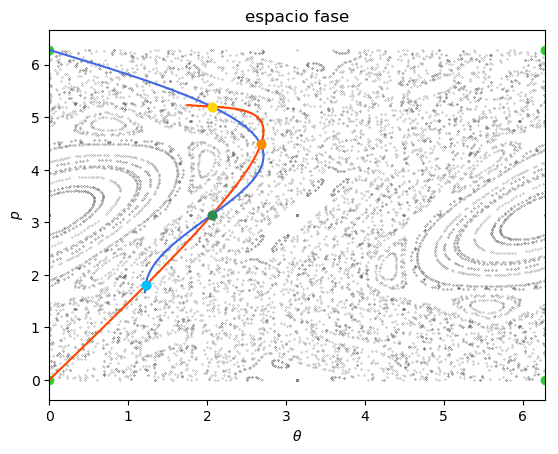

PyObject <matplotlib.collections.PathCollection object at 0x7f23dc282748>

In [136]:
pygui(false)

GraficarEst([0.1,15.4], 0.25,estandar2, Ws_2,[0.,0.],"orangered")
GraficarEst([-0.1,-15.2],- 0.25, estandar2, Wu_2,[0.,2pi],"royalblue")
colores=["gold","darkorange","seagreen","deepskyblue","violet","reed","dodgerblue"]
for ind in eachindex(r)
    plot(Ws_2[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         Ws_2[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]),"o", color=colores[ind])
end
scatter([0.,0.,2pi,2pi],[0.,2pi,0.,2pi],color="limegreen")